In [1]:
# In that etivity, we assumed that a proportion p of the population received a vaccine that is fully effective in protecting against infection.
# what if the vaccine is not perfect (as is usually the case in reality)
# there are two common assumptions modellers make about how imperfect vaccines work: the "all-or-nothing" and the "leaky" mechanism. 
# All-or-nothing vaccines give full immunity to a proportion of those vaccinated, but don't work at all in the other vaccinated people.
# In contrast, leaky vaccines reduce susceptibility in everyone who received the vaccine by the same fraction. 
# This means that vaccinated people can still become infected, but at a reduced rate (force of infection)

In [1]:
# Assuming  𝛽  equals 0.25 days −1  and  𝛾  equals 0.1 days −1 , what proportion of the population would have to be vaccinated with a perfectly effective vaccine to prevent an epidemic?
# Using the formula for the herd immunity threshold, we need a vaccine coverage of 60% with a perfect vaccine:
# 𝑝𝑐 = 1 − 1/𝑅0
# pc = 1 − 𝛾/𝛽
# pc = 1 −  0.1/0.25
# pc = 0.6

# Given the parameter assumptions above, what proportion of the population would have to be vaccinated with an all-or-nothing vaccine with 70% efficacy to prevent an epidemic?
# Under the assumption of an all-or-nothing vaccine, we can simply multiply the vaccine efficacy veff and the vaccine coverage to calculate the effective coverage peff:

# 𝑣𝑒𝑓𝑓∗𝑝𝑒𝑓𝑓 =  0.6
# 𝑝𝑒𝑓𝑓  =  0.6/0.7
# 𝑝𝑒𝑓𝑓  = 0.86

# Therefore, we need at least 86% coverage of a leaky vaccine with efficacy of 70%, to interrupt transmission (R0 < 1).

# Based on the diagram, write down the differential equations for this model on paper. What is the value of cs for a leaky vaccine with 70% efficacy?

# 𝑑𝑆/𝑑𝑡 = −𝛽𝐼/𝑁𝑆
# 𝑑𝐼/𝑑𝑡 = 𝛽𝐼/𝑁𝑆+𝑐𝑠𝛽𝐼/𝑁𝑉−𝛾𝐼
# 𝑑𝑅/𝑑𝑡 = 𝛾𝐼
# 𝑑𝑉/𝑑𝑡 = −𝑐𝑠𝛽𝐼/𝑁𝑉

# For a leaky vaccine with 70% efficacy, the value of cs would be 0.3, reflecting the degree to which susceptibility is reduced.

# Modelling a leaky vaccine with 60% coverage



Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Warning message:
"package 'deSolve' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


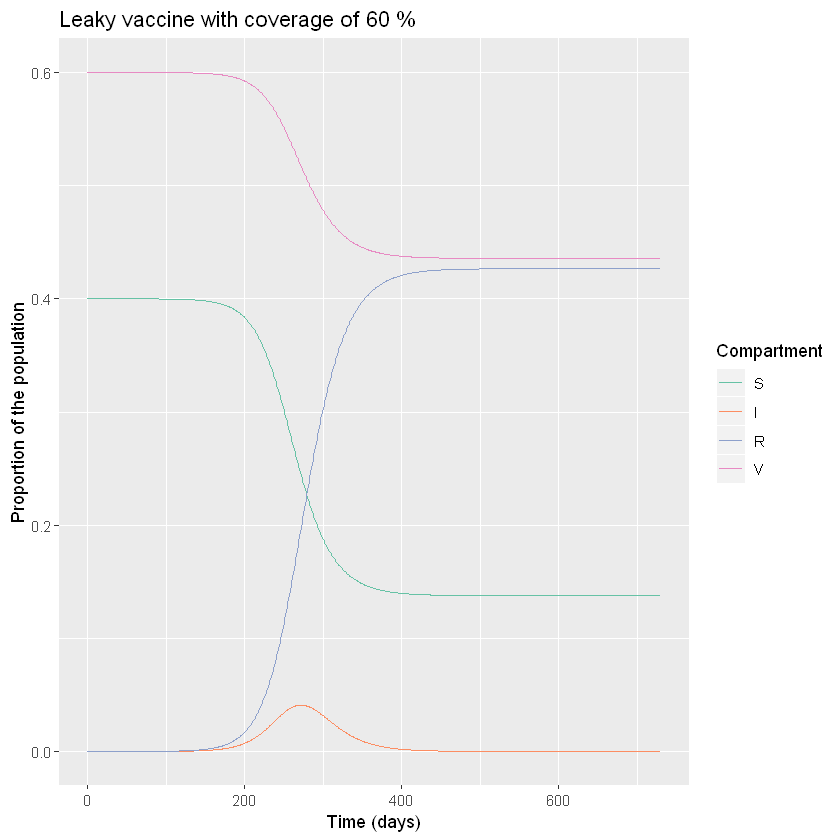

In [2]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Specify the total population size
N <- 1000000

# Specify the vaccination coverage
p <- 0.6

# Initial number of people in each compartment
initial_state_values <- c(S = (1-p)*N,    # the unvaccinated proportion of
                                          # the population is susceptible
                          I = 1,          # the epidemic starts with a
                                          # single infected person
                          R = 0,          # there is no prior immunity
                          V = p*N)        # a proportion p of the population
                                          # is vaccinated (vaccination coverage) 

# Parameters
parameters <- c(beta = 0.25,      # the infection rate in units of days^-1
                gamma = 0.1,      # the rate of recovery in units of days^-1
                c_s = 0.3)        # the reduction in the force of infection
                                  # acting on those vaccinated
                                  # note that c_s is a multiplicative term
                                  # and not a rate

# TIMESTEPS:

# Sequence of timesteps to solve the model at
times <- seq(from = 0, to = 730, by = 1)  # from 0 to 2 years, daily intervals

# MODEL FUNCTION: 

vaccine_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {    
        
    # Defining lambda as a function of beta and I:
      lambda <- beta * I/N
        
    # The differential equations
      dS <- -lambda * S            
      dI <- lambda * S - gamma * I + c_s * lambda * V  # vaccinated people (V) can
                                                       # now also move into the I compartment
      dR <- gamma * I
      dV <- - c_s * lambda * V                         # vaccinated people become infected
                                                       # at a rate c_s * lambda                   
      
    # Return the number of people in each compartment at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR, dV))) 
    })
  
}

# MODEL OUTPUT:

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vaccine_model,
                            parms = parameters))

# PLOT THE OUTPUT

# turn output dataset into long format
output_long <- melt(as.data.frame(output), id = "time")

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the number in each compartment over time
ggplot(data = output_long,                                               
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  
  geom_line() +                                                          
  xlab("Time (days)")+                                                   
  ylab("Proportion of the population") +
  labs(title = paste("Leaky vaccine with coverage of", p*100, "%"), 
       colour = "Compartment") +
  scale_colour_brewer(palette = "Set2")

In [3]:
# As you can see, a 60% coverage is not sufficient to prevent an epidemic if the vaccine is not perfectly effective.

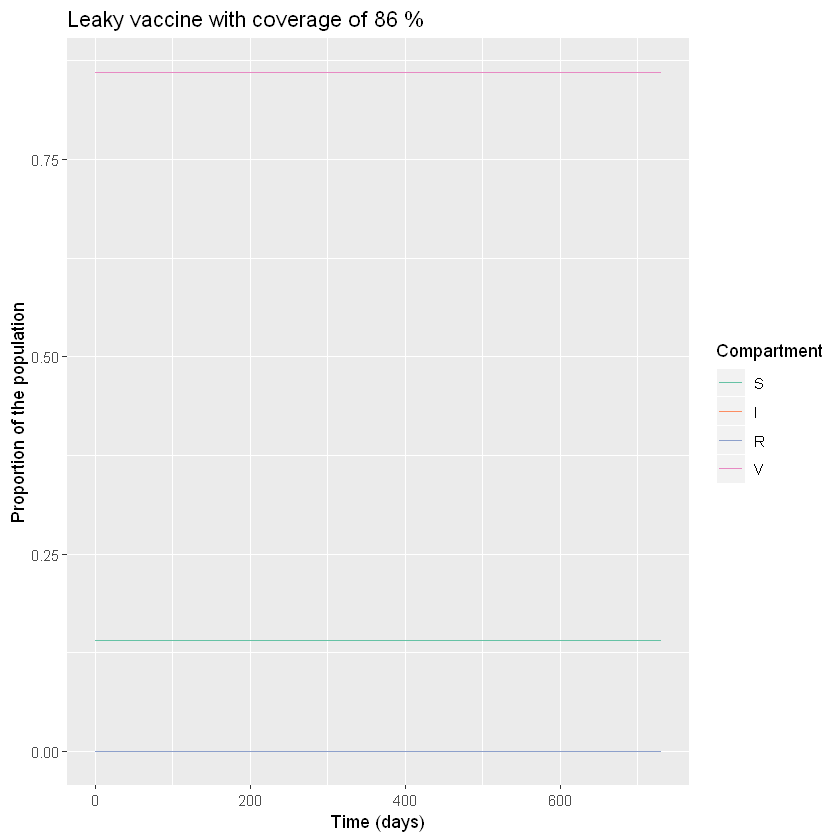

In [5]:
# Modelling a leaky vaccine with 86% coverage:

# Specify the vaccination coverage
p <- 0.86

# Initial number of people in each compartment
initial_state_values <- c(S = (1-p)*N,      # the unvaccinated proportion of
                                            # the population is susceptible
                          I = 1,            # the epidemic starts with a single
                                            # infected person
                          R = 0,            # there is no prior immunity in
                                            # the population
                          V = p*N)          # a proportion p of the population
                                            # is vaccinated (vaccination coverage) 

# MODEL OUTPUT:

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vaccine_model,
                            parms = parameters))

# PLOT THE OUTPUT

# turn output dataset into long format
output_long <- melt(as.data.frame(output), id = "time")      

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the number in each compartment over time
ggplot(data = output_long,                                               
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  
  geom_line() +                                                          
  xlab("Time (days)")+                                                   
  ylab("Proportion of the population") +
  labs(title = paste("Leaky vaccine with coverage of", p*100, "%"), 
       colour = "Compartment")  +
  scale_colour_brewer(palette = "Set2")

In [7]:
# With a leaky vaccine with 70% efficacy, what proportion of the population would have to be vaccinated to prevent an epidemic (Reff < 1)? 
# Try addressing this first through simulation.

# Instead, the simulations above suggest that we need a coverage of at least 86% with a leaky vaccine with 70% efficacy to interrupt transmission and prevent an epidemic.

# Now, can you confirm this result using equations, and not simulation? For this, think about the relationship between R0 and Reff.
# calculate the critical vaccination coverage needed to interrupt transmission (Reff < 1), in the following way.

# Remember that in a simple homogenous model, Reff is proportional to the number of susceptible people in the population. In this case:
# 𝑅𝑒𝑓𝑓 = (1−𝑝)×𝑅0 + 𝑝𝑐𝑆×𝑅0

# where p is the proportion of the population receiving the vaccine, and cs is the reduction in susceptibility owing to the vaccine

# Setting p = pc when Reff = 1, and solving this to find pc gives:

# 𝑝𝑐 = (1−1/𝑅0)/(1−𝑐𝑠)
# 𝑝𝑐 = (1−1/(0.25/0.1))/(1−0.3)
# 𝑝𝑐 = 0.866

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows